In [31]:
using CSV, FileIO

In [32]:
data = load("../data/impvol_data.jld2")

Dict{String,Any} with 10 entries:
  "import_shares"             => [0.0 7.85e-7 … 0.000689 0.0004425; 7.42e-5 0.0…
  "pwt"                       => [0.824111 0.620073 … 0.747101 1.0]…
  "va"                        => [3271.5 1407.45 … 4209.16 41311.0]…
  "p_sectoral_data"           => [33.0109 64.7924 … 16.8926 36.7882]…
  "io_values"                 => [2.49202e5 2423.0 … 6491.5 0.0; 4183.8 56086.1…
  "total_output"              => [2.00728e6 8.11942e5 … 1.74308e6 66853.4]…
  "intermediate_input_shares" => [0.973154 0.0268455 … 0.528231 0.294862]…
  "trade_balance"             => [1184.95 -1239.14 … -406.84 1074.1]…
  "output_shares"             => [0.967079 0.032921 … 0.521898 0.318506]…
  "beta"                      => [0.230777 0.441 … 0.297884 0.370242]…

In [33]:
country_names = CSV.read("../experiments/baseline/output_table.csv")[:country_names]

25-element Array{Union{Missings.Missing, String},1}:
 "Australia"             
 "Austria"               
 "Belgium and Luxembourg"
 "Canada"                
 "China"                 
 "Colombia"              
 "Denmark"               
 "Finland"               
 "France"                
 "Germany"               
 "Greece"                
 "India"                 
 "Ireland"               
 "Italy"                 
 "Japan"                 
 "Mexico"                
 "Netherlands"           
 "Norway"                
 "Portugal"              
 "ROW"                   
 "South Korea"           
 "Spain"                 
 "Sweden"                
 "United Kingdom"        
 "United States"         

In [34]:
function US_price_index(data, experiment)
    p_sectoral = data["p_sectoral_data"][1,end,:,:]
    parameters = load("../experiments/$experiment/common_parameters.jld2")["parameters"]
    nu = parameters[:nu_njt][1,1,:,:]
    sigma = parameters[:sigma]
    return sum(nu .* p_sectoral .^ (1-sigma), 1) .^ (1/(1-sigma))
end

US_price_index (generic function with 1 method)

In [35]:
cpi = US_price_index(data, "baseline")

1×36 Array{Float64,2}:
 35.4376  38.2773  42.5523  46.6367  …  101.645  106.89  112.824  121.018

In [36]:
# to conform with data structures
us_cpi = reshape(cpi[end,:] ./ cpi[end,1], (1,1,1,36))

1×1×1×36 Array{Float64,4}:
[:, :, 1, 1] =
 1.0

[:, :, 1, 2] =
 1.08013

[:, :, 1, 3] =
 1.20077

...

[:, :, 1, 34] =
 3.01628

[:, :, 1, 35] =
 3.18374

[:, :, 1, 36] =
 3.41495

In [37]:
dollar_price_index = data["pwt"] .* us_cpi

1×25×1×36 Array{Float64,4}:
[:, :, 1, 1] =
 0.824111  0.620073  0.816447  1.0138  …  0.469671  1.04781  0.747101  1.0

[:, :, 1, 2] =
 1.13928  0.794967  0.995591  1.11014  1.48942  …  1.25132  0.825225  1.08013

[:, :, 1, 3] =
 1.52982  0.933857  1.14968  1.28976  …  0.717563  1.3835  0.944179  1.20077

...

[:, :, 1, 34] =
 2.97034  3.11151  3.24665  2.87956  …  2.75368  3.65659  3.34644  3.01628

[:, :, 1, 35] =
 3.09465  3.27555  3.43202  3.21452  …  2.95442  3.86001  3.56531  3.18374

[:, :, 1, 36] =
 3.6915  3.8024  3.96694  3.60801  …  3.46284  4.47263  4.11453  3.41495

In [38]:
real_GDP_data = sum(data["va"], 3) ./ dollar_price_index

1×25×1×36 Array{Float64,4}:
[:, :, 1, 1] =
 64455.1  32858.7  40728.9  96150.9  …  37030.6  1.99307e5  1.12031e6

[:, :, 1, 2] =
 65987.6  31873.3  43138.1  1.02697e5  …  37738.0  2.06279e5  1.1607e6

[:, :, 1, 3] =
 62487.9  32634.5  43917.0  1.08425e5  …  39420.9  1.97551e5  1.13249e6

...

[:, :, 1, 34] =
 2.07778e5  88336.5  1.1404e5  3.66879e5  …  88643.8  6.06821e5  3.88293e6

[:, :, 1, 35] =
 2.14744e5  89832.9  1.14804e5  3.71386e5  …  90594.5  6.10419e5  3.89762e6

[:, :, 1, 36] =
 2.14199e5  89135.8  1.14677e5  3.6903e5  …  90539.7  6.08639e5  3.80591e6

In [39]:
include("../output.jl")
using ImpvolOutput
parameters = load("../experiments/baseline/common_parameters.jld2")["parameters"]


Dict{Symbol,Any} with 45 entries:
  :S_nt                     => [0.0 0.0 … 0.0 0.0]…
  :one_over_rho             => 0.0
  :inner_tolerance          => 0.0002
  :S_nt_data                => [1184.95 -1239.14 … -406.84 1074.1]…
  :eta                      => 4.0
  :S                        => 101
  :sigma                    => 0.999
  :d                        => [0.991383 7.85e-7 … 0.000689 0.0004425; 7.42e-5 …
  :adjustment_tolerance     => 0.0004
  :middle_step_size         => 0.449329
  :A_njs                    => Array{Float64,4}[[1466.0 503.069 … 1568.37 7165.…
  :gamma_jk                 => [0.17112 0.273944 … 0.0195213 0.0108426; 0.04826…
  :p_sectoral               => [1.26077 2.37256 … 1.79398 1.0]…
  :B_j                      => [5.5087]…
  :max_iter_adjustment      => 100
  :w_njt                    => [53118.2 20374.8 … 1.48903e5 1.12031e6]…
  :global_sectoral_shock    => [6.95666e-15]…
  :country_shock_njs        => Array{Float64,4}[[-4.75554e-17 -6.13459e-16 … 1.…
  :idi

In [40]:
function volatility(scenario)
    results = load("../experiments/$scenario/results.jld2")["results"]
    real_GDP_model = sum(ImpvolOutput.make_series(results, :real_GDP), 3)
    return ImpvolOutput.calculate_volatilities(real_GDP_model, parameters, true)[:].^0.5
end

volatility (generic function with 1 method)

In [41]:
data_volatility = ImpvolOutput.calculate_volatilities(real_GDP_data, parameters, true)[:].^0.5
model_volatility = volatility("baseline/actual")
CES05_volatility = volatility("CES05/actual")
CES2_volatility = volatility("CES2/actual")
[data_volatility model_volatility CES05_volatility CES2_volatility]

25×4 Array{Float64,2}:
 0.0303094  0.0300415  0.0449764  0.0410984
 0.0141925  0.0231827  0.0683187  0.0499613
 0.0178436  0.0319692  0.0737875  0.0415894
 0.0139213  0.0243209  0.113062   0.0679282
 0.0762416  0.0789904  0.0592084  0.0515799
 0.0292954  0.0331685  0.0724966  0.0614786
 0.0168572  0.0210174  0.0561089  0.0416209
 0.0209794  0.0248608  0.0682464  0.0427879
 0.0136174  0.0139955  0.118351   0.0621489
 0.0150374  0.0156047  0.0581191  0.031211 
 0.019087   0.0172743  0.0600213  0.0537265
 0.0307266  0.0319175  0.0550353  0.0380684
 0.0251567  0.0323672  0.0564241  0.0487941
 0.0138391  0.0137985  0.0333074  0.0242552
 0.016883   0.0171921  0.0291914  0.0355138
 0.0275122  0.0323924  0.0816478  0.0712999
 0.0116253  0.0183359  0.066994   0.0342386
 0.0253014  0.029018   0.063208   0.0386258
 0.033876   0.0395007  0.0924854  0.0719883
 0.0401403  0.0406158  0.0306344  0.0328655
 0.0315222  0.0292016  0.0737314  0.0538911
 0.0137757  0.015536   0.0750563  0.0349314
 0.015328

In [42]:
function regression(x, y)
    X = [ones(length(x)) x]
    beta = X \ y
    R2 = var(X * beta) / var(y)
    return (beta, R2, X*beta)
end

regression (generic function with 1 method)

In [43]:
using Plots
fm = x->repr(round(x, 3))


(::#29) (generic function with 1 method)

In [44]:
function plot_model_data(scenario, fname)
    model_volatility = volatility(scenario)
    beta, R2, fitted = regression(data_volatility, model_volatility)
    if beta[2]>0
        label = "y = $(fm(beta[1]))+$(fm(beta[2]))x\nR2 = $(fm(R2)), rho = $(fm(R2^.5))"
    else
        label = "y = $(fm(beta[1]))-$(fm(-beta[2]))x\nR2 = $(fm(R2)), rho = $(fm(-R2^.5))"
    end
    plot(data_volatility, fitted, label=label, xlabel="Data volatility (standard deviation)", size=(800,500))
    scatter!(data_volatility, model_volatility, label="", ylabel="Model volatility (standard deviation)")
    x = 0.002
    for i=1:length(data_volatility)
        annotate!(data_volatility[i], model_volatility[i]+x, text(country_names[i], :black, :center, 10))
    end
    savefig(fname)
end

plot_model_data (generic function with 1 method)

In [45]:
plot_model_data("baseline/actual", "../Figure2.pdf")
plot_model_data("CES05/actual", "../CES05-model-data.pdf")
plot_model_data("CES2/actual", "../CES2-model-data.pdf")
model_volatility = volatility("baseline/actual") 

25-element Array{Float64,1}:
 0.0300415
 0.0231827
 0.0319692
 0.0243209
 0.0789904
 0.0331685
 0.0210174
 0.0248608
 0.0139955
 0.0156047
 0.0172743
 0.0319175
 0.0323672
 0.0137985
 0.0171921
 0.0323924
 0.0183359
 0.029018 
 0.0395007
 0.0406158
 0.0292016
 0.015536 
 0.0186053
 0.0153593
 0.016175 

In [46]:
# without china
beta, R2 = regression([data_volatility[1:4]; data_volatility[6:end]], [model_volatility[1:4]; model_volatility[6:end]])
correlation = R2^.5

0.8786975772382217

In [47]:
# correlation of variances
beta, R2 = regression(data_volatility.^2, model_volatility.^2)
correlation = R2^.5

0.9868081768097254

In [48]:
# correlation of variances
# without china
beta, R2 = regression([data_volatility[1:4]; data_volatility[6:end]].^2, [model_volatility[1:4]; model_volatility[6:end]].^2)
correlation = R2^.5

0.8922355621331414

In [49]:
plot_model_data("EOS05/actual", "../EOS05-model-data.pdf")
plot_model_data("EOS2/actual", "../EOS2-model-data.pdf")


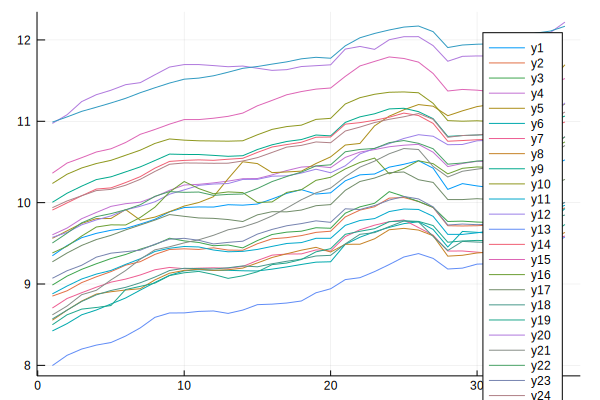

In [20]:
plot(log.(A[1,:,end,:]'))

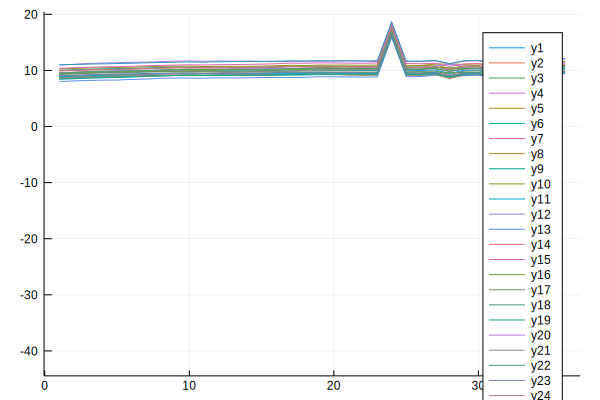

In [39]:
p = load("../experiments/baseline/common_parameters.jld2")["parameters"]
A_data = p[:A]
plot(log.(A_data[1,:,end,:]'))

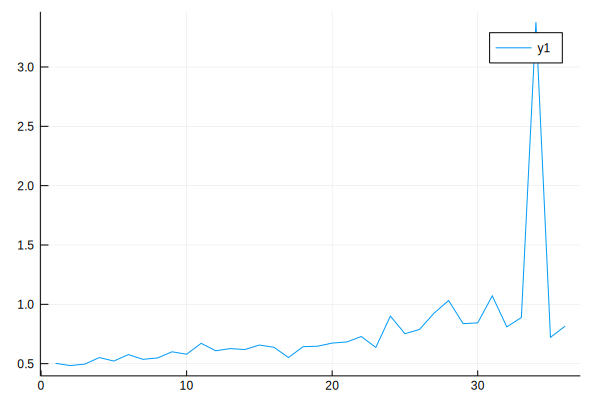

In [40]:
plot(p[:nu_njt][1,1,end,:])

In [43]:
nu_guess = p[:final_expenditure_shares]

1×25×24×36 Array{Float64,4}:
[:, :, 1, 1] =
 0.0155244  0.0249547  -0.00308011  …  0.0669844  -0.0215453  0.00345035

[:, :, 2, 1] =
 0.0749852  0.0633527  0.1205  0.0841586  …  0.093235  0.131312  0.0648263

[:, :, 3, 1] =
 0.00350737  0.0179595  0.00149248  …  0.00157639  0.00620359  0.00279835

...

[:, :, 22, 1] =
 0.0175694  -0.0875952  0.00842429  …  0.0053662  0.0218519  0.014794

[:, :, 23, 1] =
 0.0161633  0.016592  0.0345386  …  0.00755546  0.00372675  0.014234

[:, :, 24, 1] =
 0.630541  0.281001  0.319631  0.688538  …  0.718415  0.586555  0.652321

[:, :, 1, 2] =
 0.033939  0.0470475  -0.00234287  …  0.0746569  -0.0229194  0.0224292

[:, :, 2, 2] =
 0.0525279  0.0848132  0.135862  0.0792014  …  0.116864  0.118066  0.0600313

[:, :, 3, 2] =
 0.0029769  0.0261618  0.00165648  …  0.00161724  0.00463774  0.0025508

...

[:, :, 22, 2] =
 0.0224687  -0.387285  0.0207468  …  0.116892  0.00498871  0.0142167

[:, :, 23, 2] =
 0.0174049  0.0204902  0.0419344  …  0.00783221  -0.011865

In [45]:
J=p[:J]
T = p[:T]
nu = copy(nu_guess)
for j = 1:J, t=1:T
			vector = nu_guess[1,:,j,t]
			nu[1,vector .<= 0,j,t] = minimum(vector[vector .> 0])
		end


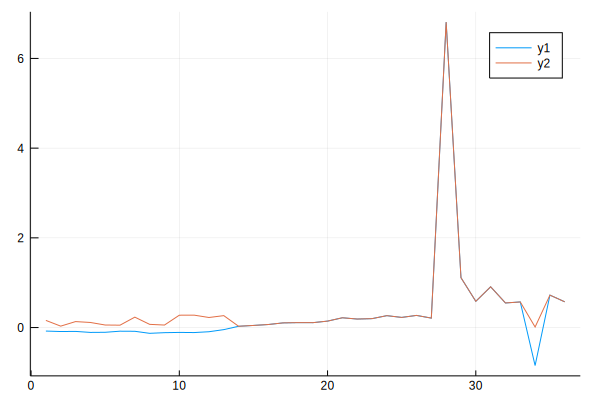

In [53]:
plot([nu_guess[1,5,end,:] nu[1,5,end,:]])

In [54]:
nu_guess[1,end,:,:]

24×36 Array{Float64,2}:
  0.00345035   0.0224292    0.00890236   …  -0.0500849    -0.0426757  
  0.0648263    0.0600313    0.0606516        0.04725       0.0432172  
  0.00279835   0.0025508    0.00245863       0.0042588     0.00361451 
  0.0165587    0.0156772    0.0134165        0.00642195    0.00571356 
  0.0197843    0.018004     0.01658          0.00398179    0.00296079 
  0.00287283   0.00258826   0.0021878    …   0.00296916    0.00297555 
  0.0052272    0.00536509   0.00240753       0.00116982    0.00012009 
  0.0124985    0.0128232    0.0151387        0.00470791    0.00411321 
  0.00567562   0.00413207   0.00245164      -0.0087558    -0.00811202 
  0.00150858   0.00462674   0.0083584       -0.0203715     0.020954   
  0.0123103    0.00914071   0.0124742    …   0.0827693     0.0121071  
 -0.00376203  -0.003928    -0.00442297      -0.00167773    0.00135931 
  0.00296337   0.00204715   0.000526025     -0.00226254   -0.0025493  
 -0.00419949  -0.00257268   0.00329712      -0.005441

In [56]:
p[:nu_njt][1,1,:,:]

24×36 Array{Float64,2}:
  0.0833179     0.0901267    0.081704     …  -0.00142279   -0.00598749 
  0.09348       0.0879668    0.0834849        0.0538693     0.060137   
  0.0080607     0.00738491   0.00706085       0.00566812    0.00554451 
  0.0312768     0.0311803    0.0261622        0.00976672    0.00535977 
  0.0176225     0.0159068    0.0137487        0.00450771    0.00483642 
  0.00598391    0.00625452   0.00582997   …   0.000223895   0.00406285 
  0.00752167    0.00805283   0.00466681       0.000400349   0.000571763
  0.012269      0.0124004    0.0147086        0.004352      0.00354918 
  0.00244841    0.00136198   7.57993e-5      -0.00550811   -0.0049725  
  0.0243838     0.0296491    0.0330667        0.0108768     0.0162915  
  0.0179984     0.015845     0.018986     …   0.115427     -0.00324187 
  0.000868655  -0.00100447   0.000293432     -0.0135236    -0.000225284
  0.0136516     0.0127919    0.0106487        0.00307209    0.00281788 
  0.00514262    0.00979203   0.0103748  

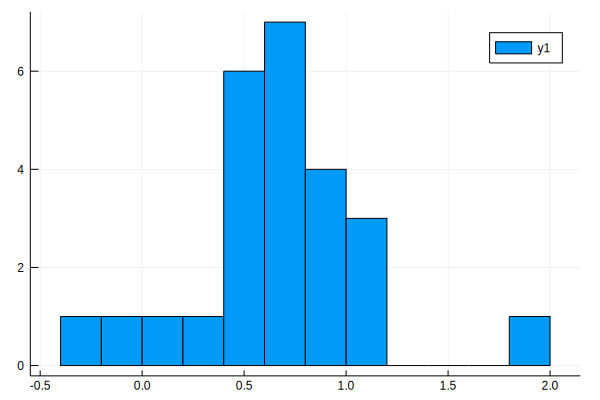

In [60]:
histogram(nu_guess[1,:,end,end])

In [62]:
vector = sort(nu_guess[1,:,end,end])

25-element Array{Float64,1}:
 -0.25576  
 -0.186071 
  0.0841557
  0.327335 
  0.405356 
  0.527353 
  0.551897 
  0.57364  
  0.590938 
  0.597717 
  0.658318 
  0.68628  
  0.691164 
  0.703062 
  0.745911 
  0.756696 
  0.778054 
  0.814095 
  0.830017 
  0.831141 
  0.874268 
  1.00649  
  1.01995  
  1.02341  
  1.99939  

In [63]:
sort(vector[vector .> 0])[2]

0.32733476961562485

In [64]:
			largest = sort(vector[vector .< 1])[end-1]


0.8311405907903878

In [86]:
p = load("../experiments/baseline/common_parameters.jld2")["parameters"]

Dict{Symbol,Any} with 45 entries:
  :S_nt                     => [0.0 0.0 … 0.0 0.0]…
  :one_over_rho             => 0.0
  :inner_tolerance          => 0.0002
  :S_nt_data                => [1184.95 -1239.14 … -406.84 1074.1]…
  :eta                      => 4.0
  :S                        => 101
  :sigma                    => 0.999
  :d                        => [0.991383 7.85e-7 … 0.000689 0.0004425; 7.42e-5 …
  :adjustment_tolerance     => 0.0004
  :middle_step_size         => 0.449329
  :A_njs                    => Array{Float64,4}[[1707.32 647.905 … 1821.11 7165…
  :gamma_jk                 => [0.17112 0.273944 … 0.0195213 0.0108426; 0.04826…
  :p_sectoral               => [1.26077 2.37256 … 1.79398 1.0]…
  :B_j                      => [5.5087]…
  :max_iter_adjustment      => 100
  :w_njt                    => [53118.2 20374.8 … 1.48903e5 1.12031e6]…
  :global_sectoral_shock    => [7.26974e-15]…
  :country_shock_njs        => Array{Float64,4}[[1.02054e-16 -3.57791e-16 … 9.4…
  :idi

In [87]:
p[:nu_njt][1,1,:,:]'

36×24 Array{Float64,2}:
 0.0827749  0.0910213  0.00772248  …  0.011307    0.0127253   0.485458
 0.0807635  0.0877083  0.00731351     0.011538    0.0118935   0.492392
 0.0785585  0.084983   0.00698622     0.0119872   0.0112555   0.499805
 0.0756376  0.0833336  0.0067202      0.0125788   0.0109285   0.509434
 0.071999   0.0820821  0.00646377     0.0130788   0.0108497   0.519888
 0.068387   0.080756   0.00625935  …  0.013352    0.0108942   0.529839
 0.0648656  0.0788119  0.00612425     0.0131984   0.0109542   0.539148
 0.0613875  0.076518   0.00612078     0.013598    0.0107204   0.548114
 0.0585357  0.0747564  0.00624306     0.0144932   0.0101618   0.55683 
 0.0568304  0.0734326  0.00644971     0.0152032   0.00940803  0.564635
 0.0561731  0.072342   0.00663495  …  0.0151155   0.0085182   0.571362
 0.0562776  0.0711944  0.00669893     0.0139731   0.00785467  0.575553
 0.0567141  0.069784   0.00663819     0.0120471   0.00749985  0.576222
 ⋮                                 ⋱                 

In [88]:
p[:final_expenditure_shares][1,:,end,:]'

36×25 Array{Float64,2}:
 0.618888  0.25588   0.264002  0.66566   …  0.572098  0.539579  0.637845
 0.623529  0.272103  0.264222  0.663603     0.506991  0.554099  0.648948
 0.631484  0.281444  0.268644  0.666894     0.463591  0.568867  0.658174
 0.644122  0.29269   0.289907  0.67795      0.456812  0.583087  0.664929
 0.656834  0.303963  0.312784  0.690262     0.473429  0.595045  0.669142
 0.666071  0.316942  0.34397   0.700158  …  0.498057  0.601564  0.671537
 0.670453  0.327509  0.358248  0.70875      0.517606  0.60148   0.674042
 0.6723    0.332577  0.345763  0.717768     0.509586  0.595734  0.677981
 0.67728   0.338919  0.326829  0.730949     0.485733  0.589351  0.684039
 0.685523  0.342308  0.325824  0.748048     0.4666    0.582208  0.691319
 0.695045  0.341283  0.343098  0.763738  …  0.436751  0.572166  0.699342
 0.70352   0.351951  0.367993  0.77098      0.385096  0.562886  0.707776
 0.71013   0.371675  0.385028  0.764656     0.313763  0.55033   0.716337
 ⋮                         

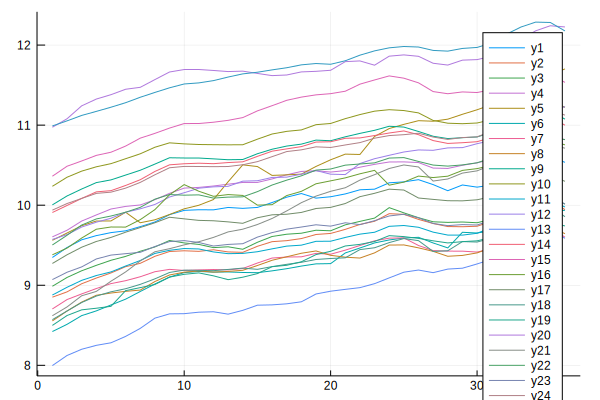

In [90]:
plot(log.(p[:A][1,:,end,:]'))

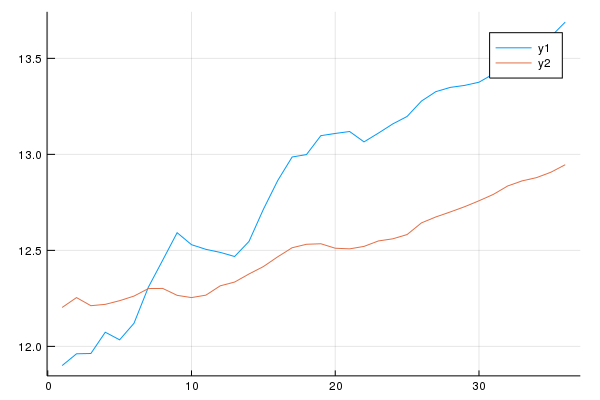

In [77]:
plot(log.([real_GDP_model[1,end-1,1,:] real_GDP_data[1,end-1,1,:]]))

In [78]:
sectoral_GDP_model = ImpvolOutput.make_series(results, :real_GDP)

1×25×24×36 Array{Float64,4}:
[:, :, 1, 1] =
 5516.78  1652.26  2596.96  9846.87  9515.21  …  2639.25  11469.6  1.08793e5

[:, :, 2, 1] =
 2505.32  592.409  1085.2  2979.0  …  1792.26  889.623  4039.11  36730.5

[:, :, 3, 1] =
 206.48  77.992  96.3106  361.03  …  224.229  116.427  622.768  4878.17

...

[:, :, 22, 1] =
 244.867  5.68644  56.9194  568.575  …  391.986  176.431  1234.11  8988.62

[:, :, 23, 1] =
 309.61  160.244  395.65  580.252  747.7  …  430.01  199.354  1297.23  8190.9

[:, :, 24, 1] =
 29157.1  11387.0  19290.8  52849.0  60473.6  …  19765.4  92094.7  7.11866e5

[:, :, 1, 2] =
 6742.08  1804.69  2964.1  10938.3  10757.0  …  2787.32  11903.3  1.18248e5

[:, :, 2, 2] =
 3217.62  638.794  1154.72  3281.01  …  2223.53  961.466  4270.46  38389.8

[:, :, 3, 2] =
 253.718  88.4228  109.843  388.762  …  266.917  130.963  639.068  5029.1

...

[:, :, 22, 2] =
 284.42  5.67113  57.2276  537.079  …  431.038  193.602  1241.06  9040.48

[:, :, 23, 2] =
 396.557  172.365  567.767  61

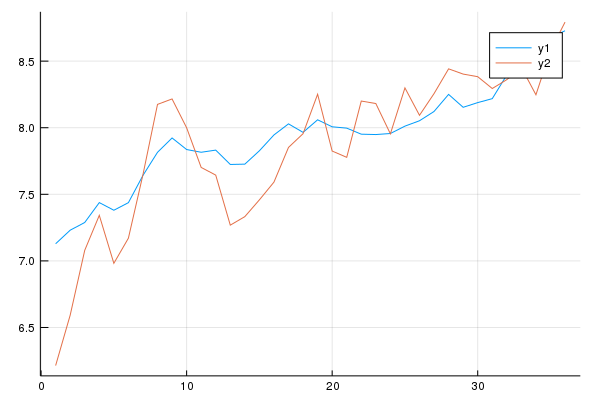

In [86]:
plot(log.([sectoral_GDP_model[1,end-1,10,:] data["va"][1,end-1,10,:]]))